In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Conv2D, MaxPool2D, Reshape, Flatten, UpSampling2D, LSTM, GRU
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
import tensorflow.keras.backend as K

In [0]:
train_data_path='/content/drive/My Drive/respiratory-dataset/train/data'
train_labels_path='/content/drive/My Drive/respiratory-dataset/train/labels'
test_data_path='/content/drive/My Drive/respiratory-dataset/test/data'
test_labels_path='/content/drive/My Drive/respiratory-dataset/test/labels'

In [0]:
def get_data(path):
  print(path)
  f = open(path, "r")
  l = f.readlines()
  n_mfcc = 30
  nb_cols = 28
  nb_rows = 860 ## most common audio length
  X = np.zeros((len(l), nb_rows, nb_cols))
  for idx, elm in enumerate(l):
    elm = elm.split('\n')[0]
    vec_str = elm.split(',')

    m = len(vec_str)
    vec = np.zeros(m)
    for i in range(m):
      vec[i] = float(vec_str[i])
    tmp = np.reshape(vec, (int(m / n_mfcc), n_mfcc))
    X[idx] = cv2.resize(tmp, (nb_cols, nb_rows), interpolation=cv2.INTER_AREA)
    if (idx % 100 == 0):
      print("Data nb {}".format(idx))
  f.close()
  return X

def get_labels(path):
  print(path)
  f = open(path, "r")
  s = f.read()
  s = s.split('\n')[0]
  labels_str = s.split(',')
  y = np.zeros(len(labels_str))
  for idx, lab in enumerate(labels_str):
    y[idx] = float(lab)
    if (idx % 100 == 0):
      print("Label nb {}".format(idx))
  return y

In [5]:
X_train = get_data(train_data_path)
y_train = get_labels(train_labels_path)
X_test = get_data(test_data_path)
y_test = get_labels(test_labels_path)

/content/drive/My Drive/respiratory-dataset/train/data
Data nb 0
Data nb 100
Data nb 200
Data nb 300
Data nb 400
Data nb 500
Data nb 600
Data nb 700
Data nb 800
Data nb 900
Data nb 1000
Data nb 1100
Data nb 1200
Data nb 1300
Data nb 1400
Data nb 1500
Data nb 1600
Data nb 1700
Data nb 1800
Data nb 1900
Data nb 2000
Data nb 2100
/content/drive/My Drive/respiratory-dataset/train/labels
Label nb 0
Label nb 100
Label nb 200
Label nb 300
Label nb 400
Label nb 500
Label nb 600
Label nb 700
Label nb 800
Label nb 900
Label nb 1000
Label nb 1100
Label nb 1200
Label nb 1300
Label nb 1400
Label nb 1500
Label nb 1600
Label nb 1700
Label nb 1800
Label nb 1900
Label nb 2000
Label nb 2100
/content/drive/My Drive/respiratory-dataset/test/data
Data nb 0
/content/drive/My Drive/respiratory-dataset/test/labels
Label nb 0


In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print("Training data shape {}".format(X_train.shape))
print("Training label shape {}".format(y_train.shape))
print("Testing data shape {}".format(X_train.shape))
print("Testing label shape {}".format(y_test.shape))

Training data shape (2133, 860, 28, 1)
Training label shape (2133,)
Testing data shape (2133, 860, 28, 1)
Testing label shape (47,)


In [7]:
### CNN-LSTM model
in_shape = (860, 28, 1)
inpt = Input(shape=in_shape)

cnn = Conv2D(32, (3, 3), activation='relu') (inpt)
cnn = BatchNormalization() (cnn)
cnn = MaxPool2D((2, 2)) (cnn)

cnn = Conv2D(64, (3, 3), activation='relu') (cnn)
cnn = BatchNormalization() (cnn)
cnn = MaxPool2D((2, 2)) (cnn)

trans = Flatten() (cnn)
trans = Dense(500, activation='relu') (trans)
trans = Reshape((1, 500)) (trans)

gru = GRU(32) (trans)
out = Dense(4, activation='softmax') (gru)
model = Model(inpt, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 860, 28, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 858, 26, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 858, 26, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 429, 13, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 427, 11, 64)       18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 427, 11, 64)       256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 213, 5, 64)        0     

In [0]:
#adm = Adam(0.001)
rmsprop = RMSprop(0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1, shuffle=True)

Epoch 1/30
67/67 [==============================] - 92s 1s/step - loss: 1.2357 - accuracy: 0.4960 - val_loss: 1.2731 - val_accuracy: 0.3404
Epoch 2/30
67/67 [==============================] - 92s 1s/step - loss: 0.9773 - accuracy: 0.5987 - val_loss: 1.2031 - val_accuracy: 0.5106
Epoch 3/30
67/67 [==============================] - 93s 1s/step - loss: 0.8855 - accuracy: 0.6324 - val_loss: 1.0293 - val_accuracy: 0.6170
Epoch 4/30
67/67 [==============================] - 92s 1s/step - loss: 0.8415 - accuracy: 0.6484 - val_loss: 1.0680 - val_accuracy: 0.6170
Epoch 5/30
67/67 [==============================] - 92s 1s/step - loss: 0.7611 - accuracy: 0.6910 - val_loss: 0.8169 - val_accuracy: 0.6809
Epoch 6/30
67/67 [==============================] - 92s 1s/step - loss: 0.7081 - accuracy: 0.7117 - val_loss: 0.8803 - val_accuracy: 0.6170
Epoch 7/30
67/67 [==============================] - 92s 1s/step - loss: 0.6913 - accuracy: 0.7239 - val_loss: 0.9740 - val_accuracy: 0.5532
Epoch 8/30
67/67 [==

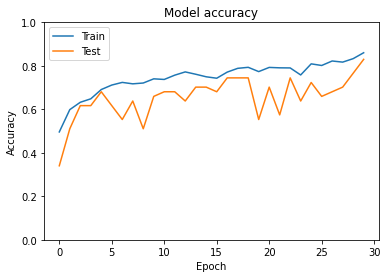

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
## compute accupacy for each class
def compute_accuracy_class(X, y):
  '''
  Compute accuracy of a class data generator
  return:
  acc_class -> array of accuracy per class
  acc -> total accuracy
  '''
  pred = model.predict(X)
  acc_class, nb_class = np.zeros(4), np.zeros(4)
  acc, n = 0, 0

  for idx, elm in enumerate(pred):
    label_pred = np.argmax(elm)
    label_true = int(y[idx])
    nb_class[label_true] += 1
    if (label_pred == label_true):
      acc += 1
      acc_class[label_true] += 1
    n += 1
  return acc_class / nb_class, acc / n

In [0]:
acc_class, acc = compute_accuracy_class(X_test, y_test)

In [13]:
print("Total Accuracy {}".format(acc))
print("Classes Accuracy {}".format(acc_class))

Total Accuracy 0.8297872340425532
Classes Accuracy [0.28571429 0.7        1.         1.        ]
